In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Microdados.csv', delimiter=';', encoding='utf-8')


In [3]:
df.dtypes

MUNICÍPIO DO FATO      object
REGIAO GEOGRÁFICA      object
NATUREZA               object
DATA DO FATO           object
ANO                     int64
SEXO                   object
IDADE SENASP           object
TOTAL DE ENVOLVIDOS     int64
dtype: object

In [4]:
#Mostrar as 5 primeiras linhas do dataframe
df.head()

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS
0,AFOGADOS DA INGAZEIRA,SERTÃO,INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,01/01/2015,2015,FEMININO,6) 35-64,1
1,AFRANIO,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,01/01/2015,2015,FEMININO,5) 30-34,1
2,AFRANIO,SERTÃO,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,01/01/2015,2015,FEMININO,4) 25-29,1
3,AGUAS BELAS,AGRESTE,ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/...,01/01/2015,2015,FEMININO,2) 12-17,1
4,ALAGOINHA,AGRESTE,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,01/01/2015,2015,FEMININO,6) 35-64,1


In [5]:
#Exibir as 5 últimas linhas
df.tail()

,MUNICÍPIO DO FATO,REGIAO GEOGRÁFICA,NATUREZA,DATA DO FATO,ANO,SEXO,IDADE SENASP,TOTAL DE ENVOLVIDOS
345679,TRINDADE,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,31/08/2024,2024,MASCULINO,6) 35-64,1
345680,TRIUNFO,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,31/08/2024,2024,FEMININO,5) 30-34,1
345681,TRIUNFO,SERTÃO,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,31/08/2024,2024,FEMININO,5) 30-34,1
345682,VERTENTES,AGRESTE,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,31/08/2024,2024,FEMININO,3) 18-24,1
345683,VITORIA DE SANTO ANTAO,ZONA DA MATA,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,31/08/2024,2024,FEMININO,6) 35-64,1


In [6]:
#Reduzindo o dataframe apenas às colunas selecionadas
df = df[['REGIAO GEOGRÁFICA', 'NATUREZA', 'ANO', 'SEXO', 'IDADE SENASP']]
df

,REGIAO GEOGRÁFICA,NATUREZA,ANO,SEXO,IDADE SENASP
0,SERTÃO,INJÚRIA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015,FEMININO,6) 35-64
1,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015,FEMININO,5) 30-34
2,SERTÃO,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015,FEMININO,4) 25-29
3,AGRESTE,ESTUPRO DE VULNERÁVEL POR VIOLÊNCIA DOMÉSTICA/...,2015,FEMININO,2) 12-17
4,AGRESTE,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2015,FEMININO,6) 35-64
...,...,...,...,...,...
345679,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2024,MASCULINO,6) 35-64
345680,SERTÃO,AMEAÇA POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2024,FEMININO,5) 30-34
345681,SERTÃO,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2024,FEMININO,5) 30-34
345682,AGRESTE,LESÃO CORPORAL POR VIOLÊNCIA DOMÉSTICA/FAMILIAR,2024,FEMININO,3) 18-24


In [7]:
#isnull() é utilizado para identificar se há valores nulos no dataframe
df_nulos = df.isnull().sum()
df_nulos

REGIAO GEOGRÁFICA    0
NATUREZA             0
ANO                  0
SEXO                 0
IDADE SENASP         0
dtype: int64

In [8]:
#Retorna a quantidade de linhas e colunas do DataFrame
df.shape

(345684, 5)

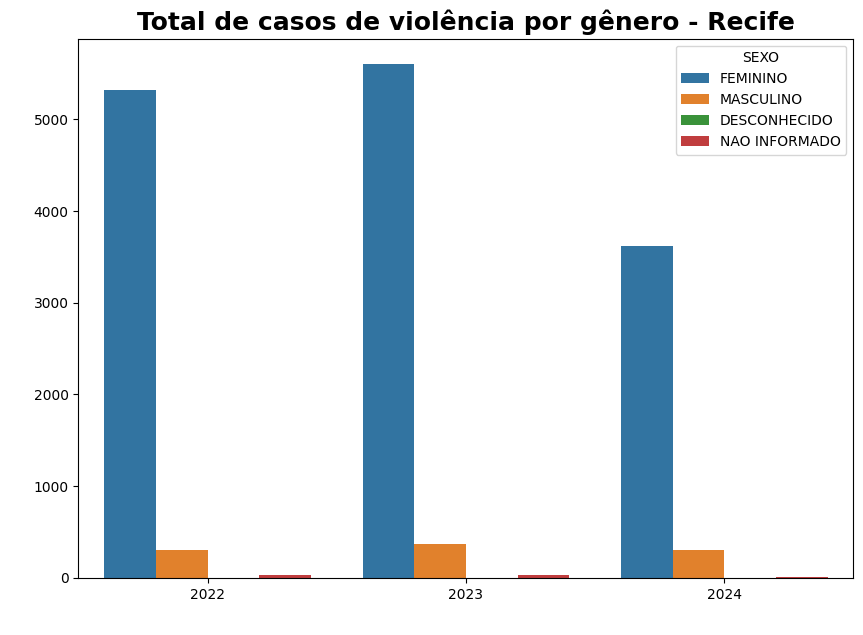

In [9]:
# Filtra o DataFrame por ano e região
df_filtrado = df[(df['ANO'].between(2022, 2024)) & (df['REGIAO GEOGRÁFICA'] == 'RECIFE')]

# Inicializa a matplotlib figure
fig, axs = plt.subplots(figsize=(10, 7))

sns.countplot(x='ANO', hue='SEXO', data=df_filtrado)
plt.title('Total de casos de violência por gênero - Recife', fontsize=18, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel(' ', fontsize=12, fontweight='bold')

# Contagem e anotação
df_counts = df_filtrado.groupby(['ANO', 'SEXO']).size()
for (ano, sexo), v in df_counts.items():
    axs.annotate(f"{v:.2f}", (ano, v), ha='center', va='bottom')

plt.show()


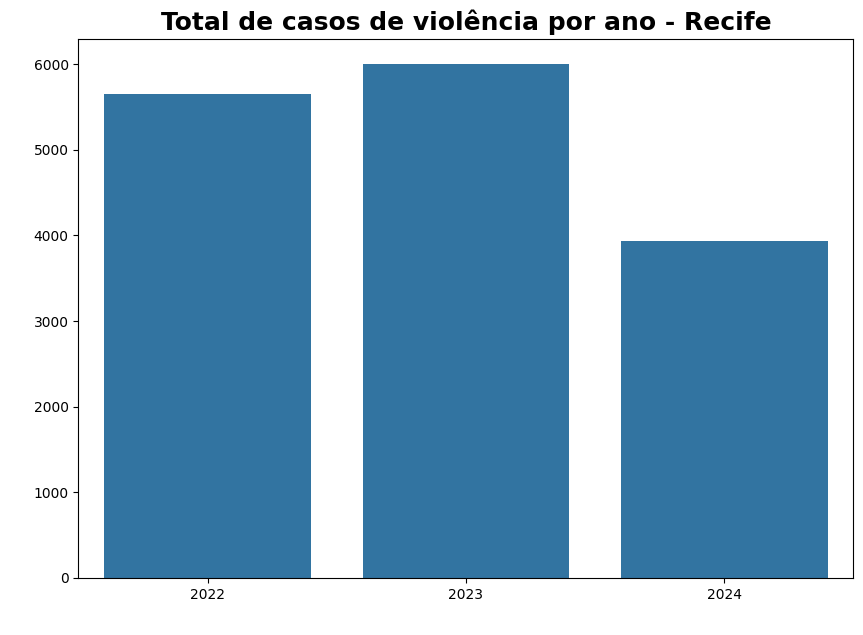

In [10]:
# Filtra o DataFrame por ano
df_filtrado = df[(df['ANO'].between(2022, 2024)) & (df['REGIAO GEOGRÁFICA'] == 'RECIFE')]

# Inicializa a matplotlib figure
fig, axs = plt.subplots(figsize=(10, 7))

sns.countplot(x='ANO', data=df_filtrado)
plt.title('Total de casos de violência por ano - Recife', fontsize=18, fontweight='bold')
axs.set_xlabel(' ', fontsize=12, fontweight='bold')
axs.set_ylabel(' ', fontsize=12, fontweight='bold')

# Contagem e anotação
df_counts = df_filtrado.groupby(['ANO']).size()
for (ano), v in df_counts.items():
    axs.annotate(f"{v:.2f}", (ano, v), ha='center', va='bottom')

plt.show()


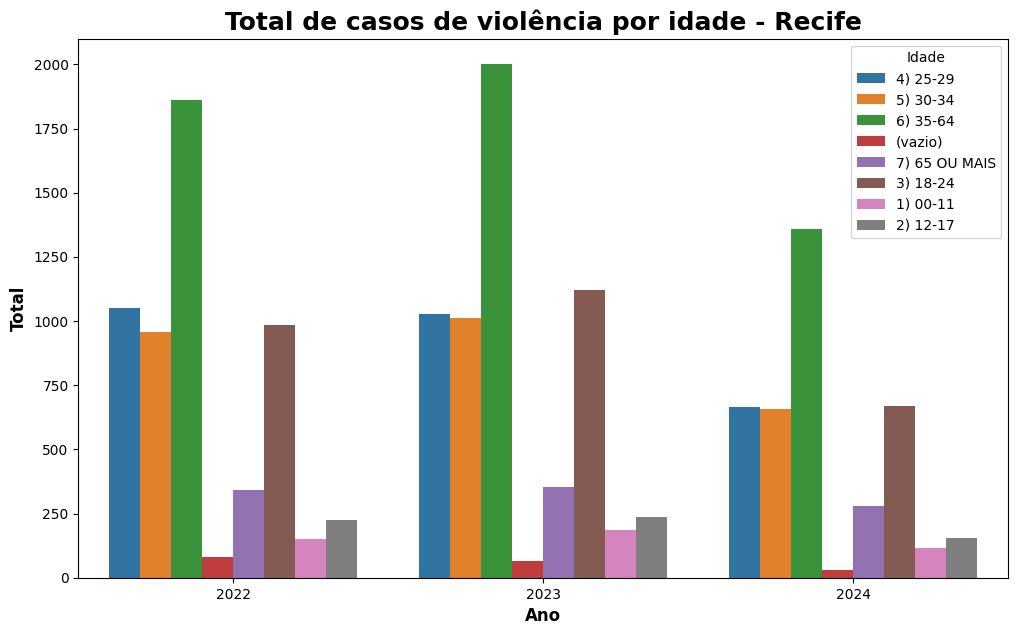

In [11]:
# Filtra o DataFrame por ano e região
df_filtrado = df[(df['ANO'].between(2022, 2024)) & (df['REGIAO GEOGRÁFICA'] == 'RECIFE')]

# Inicializa a matplotlib figure
fig, axs = plt.subplots(figsize=(12, 7))

# Cria um gráfico de contagem agrupado por ANO, SEXO e IDADE SENASP
sns.countplot(x='ANO', hue='IDADE SENASP', data=df_filtrado)
plt.title('Total de casos de violência por idade - Recife', fontsize=18, fontweight='bold')
axs.set_xlabel('Ano', fontsize=12, fontweight='bold')
axs.set_ylabel('Total', fontsize=12, fontweight='bold')

# Contagem e anotação
df_counts = df_filtrado.groupby(['ANO', 'IDADE SENASP']).size()
for (ano, idade), v in df_counts.items():
    axs.annotate(f"{v:.2f}", (ano, v), ha='center', va='bottom')

plt.legend(title='Idade')
plt.show()


C:\Users\rayan\AppData\Local\Temp\ipykernel_22972\1103560045.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=natureza_counts.values, y=natureza_counts.index, palette="viridis")


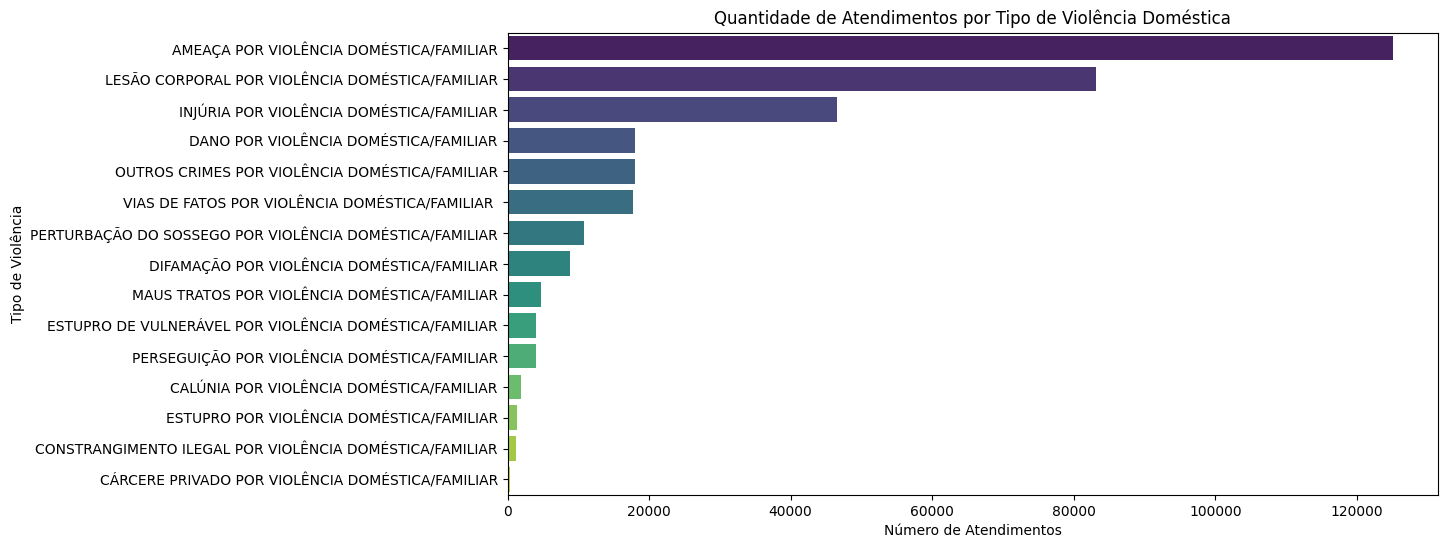

In [12]:
# 1. Gráfico de Barras: Tipos de Violência
natureza_counts = df['NATUREZA'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=natureza_counts.values, y=natureza_counts.index, palette="viridis")
plt.title("Quantidade de Atendimentos por Tipo de Violência Doméstica")
plt.xlabel("Número de Atendimentos")
plt.ylabel("Tipo de Violência")
plt.show()

In [13]:
# Salvar a base filtrada em um novo arquivo CSV
df_filtrado.to_csv('sua_base_filtrada.csv', index=False)